In [26]:
import tensorflow as tf
from tensorflow import keras

In [27]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [28]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


In [29]:
train_images.shape, test_images.shape


((60000, 28, 28), (10000, 28, 28))

In [30]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

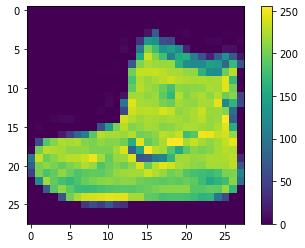

In [6]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [31]:
train_images = train_images / 255.0
test_images = test_images / 255.0

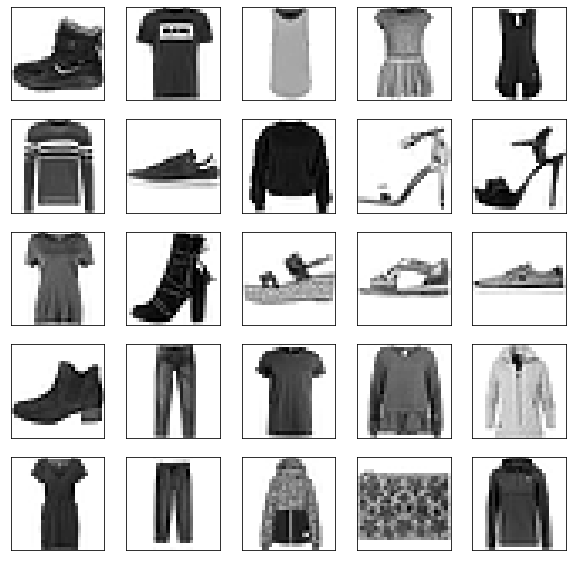

In [8]:
plt.figure(figsize = (10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel = class_names[train_labels[i]]
plt.show()

In [ ]:
#train_labels_onehot = tf.keras.utils.to_categorical(train_labels)
#test_labels_onehot = tf.keras.utils.to_categorical(test_labels)
#train_labels_onehot[0]

In [50]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation='softmax')
])

In [41]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_9 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [51]:
#用顺序编码（0~9）时选SparseCategoricalCrossentropy，用one-hot则选CategoricalCrossentropy
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels))


Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.8563 - accuracy: 0.6869 - val_loss: 0.5029 - val_accuracy: 0.8133
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6004 - accuracy: 0.7896 - val_loss: 0.4619 - val_accuracy: 0.8425
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5534 - accuracy: 0.8054 - val_loss: 0.4488 - val_accuracy: 0.8408
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5258 - accuracy: 0.8178 - val_loss: 0.4297 - val_accuracy: 0.8470
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5134 - accuracy: 0.8206 - val_loss: 0.4219 - val_accuracy: 0.8512


In [46]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

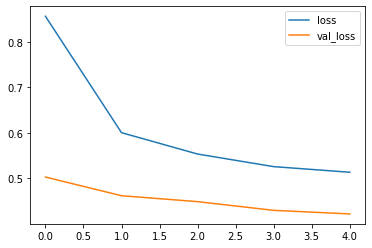

In [52]:
plt.plot(history.epoch, history.history.get('loss'), label='loss')
plt.plot(history.epoch, history.history.get('val_loss'), label='val_loss')
plt.legend()

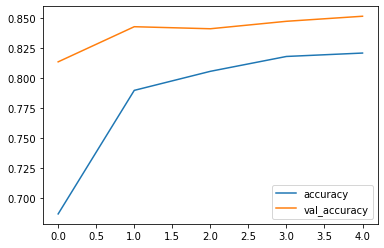

In [53]:
plt.plot(history.epoch, history.history.get('accuracy'), label='accuracy')
plt.plot(history.epoch, history.history.get('val_accuracy'), label='val_accuracy')
plt.legend()

In [12]:
predict = model.predict(test_images)
predict.shape

(10000, 10)

In [13]:
predict[0]


array([3.8741669e-06, 9.6824433e-09, 5.3760073e-07, 2.6473016e-08,
       7.2640802e-07, 1.2760853e-02, 8.5894872e-06, 3.0577341e-02,
       1.0576611e-05, 9.5663750e-01], dtype=float32)

In [14]:
np.argmax(predict[0])

9

In [15]:
test_labels[0]

9

In [16]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

313/313 - 1s - loss: 0.3442 - accuracy: 0.8748


In [17]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)

In [18]:
predictions[0]

array([0.08586048, 0.08586016, 0.08586021, 0.08586016, 0.08586022,
       0.08696283, 0.08586089, 0.08852609, 0.08586106, 0.22348793],
      dtype=float32)

In [19]:
np.argmax(predictions[0])

9

In [20]:
test_labels[0]

9